<a href="https://colab.research.google.com/github/daaaanish17/ANN-Implementation/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 511.7 MB 3.5 kB/s 
     |████████████████████████████████| 1.6 MB 45.6 MB/s 
     |████████████████████████████████| 5.8 MB 21.3 MB/s 
     |████████████████████████████████| 438 kB 23.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninst

In [3]:
import tensorflow as tf
tf.__version__

'2.9.0'

Importing libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Binary Classification Problem

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Divide the dataset into dependent and independent features

In [20]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

FEATURE ENGINEERING

In [21]:
# one-hot encoding 
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [22]:
x.drop(columns=['Gender', 'Geography'], inplace=True)

In [23]:
x = pd.concat([x, gender, geography], axis=1)

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

FEATURE SCALING

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [30]:
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
print(X_test.shape)
print(X_train.shape)

(2000, 11)
(8000, 11)


Creating ANN

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

Initialize ANN

In [54]:
model = Sequential()

Adding input layer

In [55]:
model.add(Dense(units=11, activation='relu'))

Adding first hidden layer 

In [56]:
model.add(Dense(units=7, activation='relu'))

# adding dropout layer
model.add(Dropout(0.2))

Adding second hidden layer

In [57]:
model.add(Dense(units=6, activation='relu'))

# adding dropout layer
model.add(Dropout(0.3))

Adding output layer

In [58]:
model.add(Dense(1, activation='sigmoid'))

Compile the entire neural network

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# by default adam using a learning rate 0.01

If you want to initialize learning rate by your own

In [42]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

TRAIN NEURAL NETWORK

Early Stopping (when the accuracy of the model is not at all increasing automatically the training of the model will stop)

https://keras.io/api/callbacks/early_stopping/

In [60]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [61]:
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100 ,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 5s 6ms/step - loss: 0.5894 - accuracy: 0.7373 - val_loss: 0.4902 - val_accuracy: 0.7902
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5031 - accuracy: 0.7990 - val_loss: 0.4576 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.8067 - val_loss: 0.4358 - val_accuracy: 0.8050
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4470 - accuracy: 0.8179 - val_loss: 0.4157 - val_accuracy: 0.8194
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4246 - accuracy: 0.8278 - val_loss: 0.4019 - val_accuracy: 0.8266
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8364 - val_loss: 0.3907 - val_accuracy: 0.8368
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3984 - accuracy: 0.8397 - val_loss: 0.3825 - val_accuracy: 0.8372

In [62]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Summarize history for accuracy

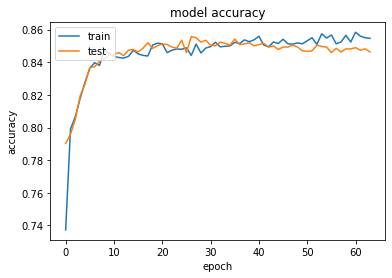

In [63]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction

In [64]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   79],
       [ 339,   54]])

Calculating Accuracy

In [66]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.791

get the weights

In [67]:
model.get_weights()

[array([[ 2.37894967e-01, -1.39695615e-01,  1.15772307e-01,
         -7.39254244e-03, -1.78091347e-01, -1.20556772e-01,
         -2.19804823e-01, -8.44486505e-02,  2.46466324e-03,
         -4.94090952e-02,  2.88285285e-01],
        [-1.27939079e-02,  1.68974146e-01, -9.77695465e-01,
         -3.03990424e-01,  7.46290207e-01,  7.70257890e-01,
         -5.42060018e-01,  1.18525989e-01, -7.05929279e-01,
          2.42350385e-01,  7.15494633e-01],
        [ 4.10441488e-01, -6.23369701e-02,  1.51885882e-01,
          3.38909984e-01, -1.15396399e-02,  9.42151397e-02,
          2.56867886e-01,  7.99135712e-04,  2.33719096e-01,
          2.80664042e-02,  2.31620714e-01],
        [ 1.81411073e-01, -4.77998070e-02, -2.26896942e-01,
          3.91332358e-02, -3.25355589e-01,  1.93674006e-02,
          1.53267175e-01, -7.78080881e-01, -5.13779461e-01,
          4.66393292e-01, -3.75735104e-01],
        [ 6.22203231e-01,  1.00635111e+00,  2.05314755e-01,
         -3.62718701e-02, -7.70348370e-01,  